# This project is about the Sentimental analysis on tweets
The topic of the project is elon musk


R V SAITEJA 

# Import the libraries

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from textblob import TextBlob
from wordcloud import WordCloud

# Twitter API Credentials

In [2]:
consumerkey="oWDkACX2oymCcM3kWCwCYdLhB"
consumerSecret="1U3WDucpXKkxUIJpHfbHSg8ttIlWCD7IqfBiq01AdRKp6ekJKQ"
accessToken="1589543145599299589-J8QyTp30LXuKvOR9K8h6Uzto8flvFD"
accessSecret="Ddd3EtCcZEwwlrTeo44owkEUOdt82MXYpZZykoFh7PZzn"

# Authenticating Twitter API with Tweepy

In [3]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerkey, consumerSecret)

#Set the access token and access token secret
authenticate.set_access_token(accessToken,accessSecret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate,wait_on_rate_limit = True)

In [5]:

posts = api.user_timeline(screen_name = "elonmusk",count = 100,lang= "en", tweet_mode = "extended")

#print the last 5 tweets from teh account
print("Show the 5 recent tweets : \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' +  tweet.full_text + '\n')
    i = i + 1

Show the 5 recent tweets : 

1) You might notice small, sometimes major, improvements in speed of Twitter. Will be especially significant in countries far away from USA.

2) Tesla Full Self-Driving Beta is now available to anyone in North America who requests it from the car screen, assuming you have bought this option. 

Congrats to Tesla Autopilot/AI team on achieving a major milestone!

3) @TomFitton That’s the general idea

4) @ramzpaul Removing child exploitation is priority #1. Please reply in comments if you see anything that Twitter needs to address.

5) @joevezz Oh we have quite the adventure ahead!



# Creating df of tweets

In [6]:
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns = ['Tweets'])
df.head()

,Tweets
0,"You might notice small, sometimes major, impro..."
1,Tesla Full Self-Driving Beta is now available ...
2,@TomFitton That’s the general idea
3,@ramzpaul Removing child exploitation is prior...
4,@joevezz Oh we have quite the adventure ahead!


# Cleaning The Text

In [7]:
def cleanTxt(text):
    text = re.sub(r'@[a-zA-Z0-9]+','',text)  #remove @mention
    text = re.sub(r'#','',text)              #remove # Sign
    text = re.sub(r'RT[\s]+','',text)        #remove RT
    text = re.sub(r'https?:\/\/.*[\r\n]*','',text) #remove Links
    
    return text
#Calling Function
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Showing Cleaned Data

In [8]:
df.head()

,Tweets
0,"You might notice small, sometimes major, impro..."
1,Tesla Full Self-Driving Beta is now available ...
2,That’s the general idea
3,Removing child exploitation is priority 1. Pl...
4,Oh we have quite the adventure ahead!


# Applying Subjectivity

In [9]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)

# Applying Polarity

In [10]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Showing DataFrame with Subjectivity and Polarity

In [11]:
df.head()

,Tweets,Subjectivity,Polarity
0,"You might notice small, sometimes major, impro...",0.725000,0.165625
1,Tesla Full Self-Driving Beta is now available ...,0.483333,0.276042
2,That’s the general idea,0.500000,0.050000
3,Removing child exploitation is priority 1. Pl...,0.000000,0.000000
4,Oh we have quite the adventure ahead!,0.000000,0.000000


# Plotting WordCloud

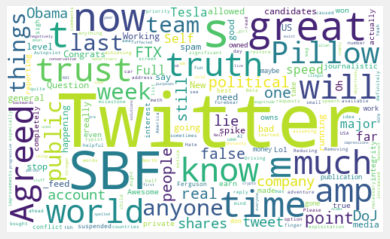

In [12]:
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300,background_color="white", random_state = 23, max_font_size = 100).generate(allWords)

plt.imshow(wordCloud , interpolation = "bilinear")
plt.axis('off')
plt.show()


# Analyzing The Tweets

In [13]:
#Creating a function to Analyze the tweets on basis of Polarity
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [14]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,"You might notice small, sometimes major, impro...",0.725000,0.165625,Positive
1,Tesla Full Self-Driving Beta is now available ...,0.483333,0.276042,Positive
2,That’s the general idea,0.500000,0.050000,Positive
3,Removing child exploitation is priority 1. Pl...,0.000000,0.000000,Neutral
4,Oh we have quite the adventure ahead!,0.000000,0.000000,Neutral
...,...,...,...,...
95,Wasn’t Twitter supposed to die by now or somet...,0.000000,0.000000,Neutral
96,A large coalition of political/social activ...,0.428571,0.214286,Positive
97,Correct,0.000000,0.000000,Neutral
98,Not even Associated Press with their complet...,0.125000,0.000000,Neutral


# Displaying All Positive Tweets

In [15]:
j =1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j = j +1

1) You might notice small, sometimes major, improvements in speed of Twitter. Will be especially significant in countries far away from USA.

2) Tesla Full Self-Driving Beta is now available to anyone in North America who requests it from the car screen, assuming you have bought this option. 

Congrats to Tesla Autopilot/AI team on achieving a major milestone!

3)  That’s the general idea

4)  Great point! ♥️♥️♥️

5)  Fun level on Twitter has definitely increased! I’m having a great time tbh.

6)   It is objectively the case that “conservative” political candidates were more negatively affected than “progressive” candidates.

Anyone using Twitter knows this. Question is simply one of magnitude.

7) : Stronger ROI for advertisers.
Relevant ads for everyone.

New Twitter solutions are now live 👇


8)  If SBF was as good at running a crypto exchange as he was at bribing media, FTX would still be solvent!

9) Have a great Thanksgiving! 🇺🇸♥️🇺🇸

10)  Is this really still happening ?

11)  Lo

# Displaying The Negative Tweets

In [16]:
j =1
sortedDF = df.sort_values(by=['Polarity'], ascending = False)
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j = j +1

1) I have half a mind to wag my finger at the 1500 accounts that caused the spike, but I shall forebear 🙄

2)  Yeah, these are umm … bad words. I read through the list last week &amp; have to say I learned a few things 😳!!

3) Hate speech impressions down by 1/3 from pre-spike levels. Congrats to Twitter team! 

4)   They need to exist to stop scams, spam, NSFW &amp; illegal stuff from going viral, but they should obviously not be used for political purposes

5)  Agreed, that is not ok

6)  It has been really bad. Far left San Francisco/Berkeley views have been propagated to the world via Twitter. 

I’m sure this comes as no surprise to anyone watching closely.

Twitter is moving rapidly to establish an even playing field. No more thumb on the scale!

7)   It’s not a real publication

8)  🤣🤣 with maybe a little editorial help from SBF’s employees 

9)   No grey area. Flat wrong.

10)   I did not take the money. SBF/FTX do not own shares in Twitter.

11) _ Haha sorry code release toward

# Plot Polarity and Subjectivity

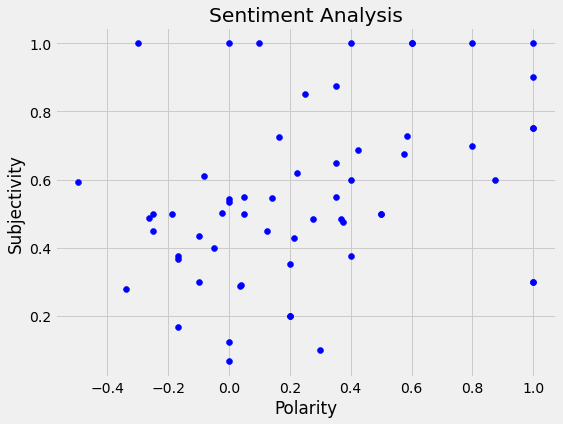

In [17]:
plt.figure(figsize =(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = "Blue")
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# Getting Percentage of Neutral Tweets

In [18]:
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

45.0

# Getting Percentage of Positive Tweets

In [19]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

40.0

# Getting Percentage of Negative Tweets

In [20]:
netweets = df[df.Analysis == 'Negative']
netweets = netweets['Tweets']

round((netweets.shape[0] / df.shape[0]) * 100, 1)

15.0

In [21]:
df['Analysis'].value_counts()

Neutral     45
Positive    40
Negative    15
Name: Analysis, dtype: int64

# Plot and Visualize the counts

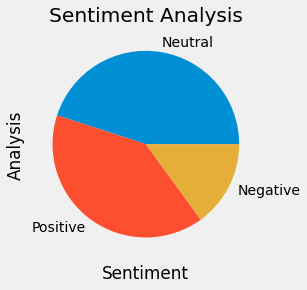

In [22]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind = 'pie')
plt.show()

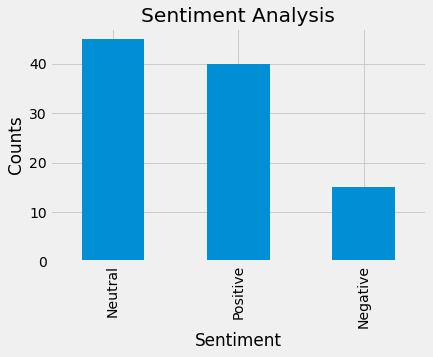

In [23]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()